In [13]:
import numpy as np
import matplotlib.pyplot as plt

datafile = '/Users/georgeau/Desktop/research_data/local_macbook/intermediate_transporter/20220125_182048_intermediate_transporter/DEBUG_intermediate_transporter_20220125_182048_data.csv'

D = np.loadtxt(f'{datafile}', delimiter=',', skiprows=1, usecols=[1,2,3,4,5,6,7,8,9,10,11,12]).T  # load data from file

[(7, 13), (0, 6), (0, 6), (4, 10), (-1, 5), (-1, 5), (-1, 5), (-1, 5), (4, 10), (0, 6), (0, 6), (5e-14, 1.5000000000000002e-13)]
[1.e+01 3.e+00 3.e+00 7.e+00 2.e+00 2.e+00 2.e+00 2.e+00 7.e+00 3.e+00
 3.e+00 1.e-13]


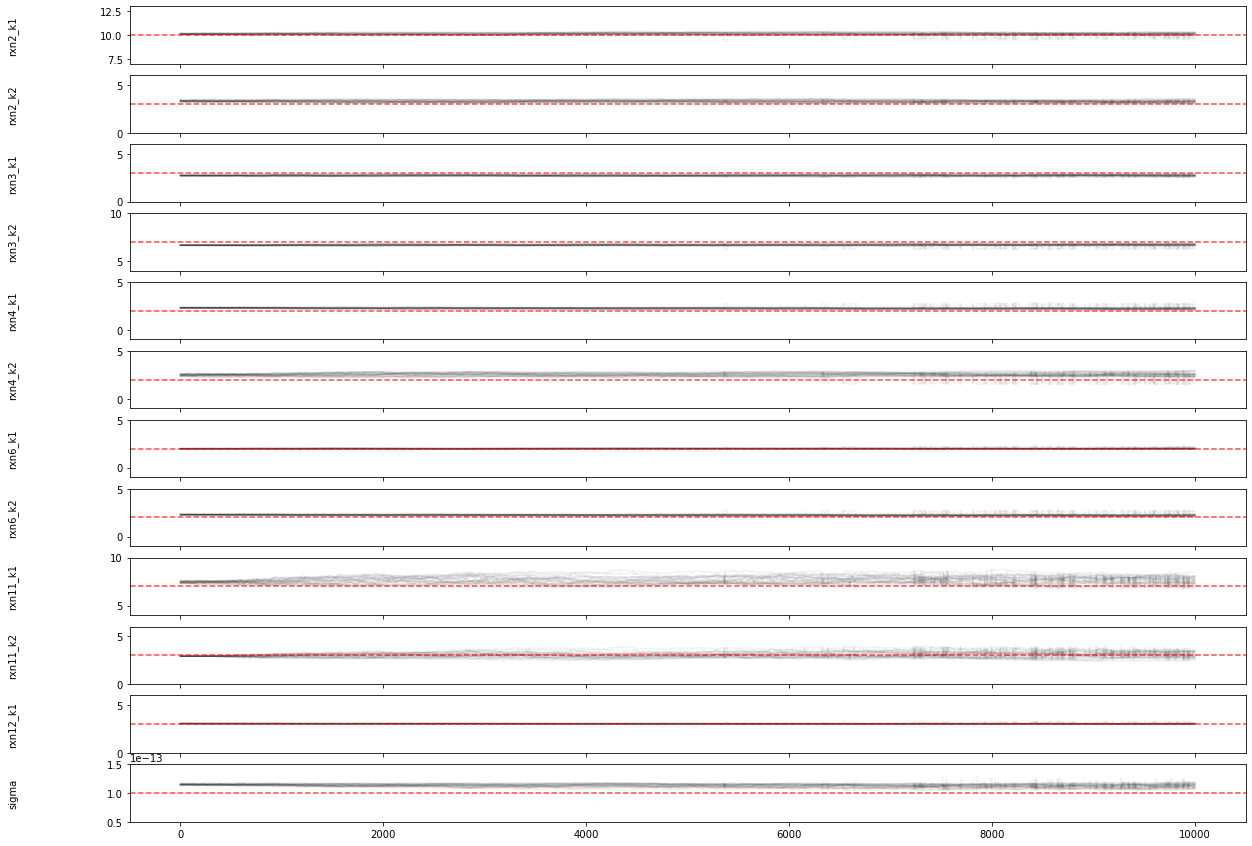

In [14]:
n_walkers = 24
n_dim = np.shape(D)[0]
n_steps = int(1e4)
labels = [
    'rxn2_k1',
    'rxn2_k2',
    'rxn3_k1',
    'rxn3_k2',
    'rxn4_k1',
    'rxn4_k2',
    'rxn6_k1',
    'rxn6_k2',
    'rxn11_k1',
    'rxn11_k2',
    'rxn12_k1',
    'sigma'
]

s=0
sigma_ref = 1e-13
k_H_on = np.log10(1e10)
k_H_off = np.log10(1e3)
k_S_on = np.log10(1e7)
k_S_off = np.log10(1e3)
k_conf = np.log10(1e2)

k_conf_range = (-1-s,5)
k_H_on_range = (7-s,13)
k_H_off_range = (0-s,6)
k_S_on_range = (4-s,10)
k_S_off_range = (0-s,6)
# sigma_range = (np.log10(5e-14,5e-13))
sigma_range = ((1e-13 - (1e-13*0.5)), (1e-13 + (1e-13*0.5)))


### boundary ranges
bounds=[0]*n_dim

# rxn2: OF + $H_out -> OF_Hb; vol*(rxn2_k1*OF*H_out - rxn2_k2*OF_Hb)
bounds[0] = k_H_on_range # rxn2_k1
bounds[1] = k_H_off_range  # rxn2_k2

# rxn3: OF_Sb -> OF + $S_out; vol*(rxn3_k1*OF_Sb - rxn3_k2*OF*S_out)
bounds[2] = k_S_off_range  # rxn3_k1
bounds[3] = k_S_on_range # rxn3_k2

# rxn4: OF_Hb -> IF_Hb; vol*(rxn4_k1*OF_Hb - rxn4_k2*IF_Hb)
bounds[4] = k_conf_range # rxn4_k1
bounds[5] = k_conf_range # rxn4_k2

# rxn6: IF_Sb -> OF_Sb; vol*(rxn6_k1*IF_Sb - rxn6_k2*OF_Sb)
bounds[6] = k_conf_range # rxn6_k1
bounds[7] = k_conf_range # rxn6_k2

# rxn11: IF_Hb + S_in -> IF_Hb_Sb; vol*(rxn11_k1*IF_Hb*S_in - rxn11_k2*IF_Hb_Sb)
bounds[8] = k_S_on_range  # rxn11_k1
bounds[9] = k_S_off_range   # rxn11_k2    

# rxn12: IF_Hb_Sb -> IF_Sb + H_in; vol*(rxn12_k1*IF_Hb_Sb - rxn12_k2*IF_Sb*H_in)
bounds[10] = k_H_off_range  # rxn12_k1
# bounds[11] = k_H_on_range  # rxn12_k2    

# experimental noise
bounds[11] = sigma_range # sigma  


# # rxn9
# bounds[11] = k_H_off_range
# bounds[12] = k_H_on_range

# # rxn10
# bounds[13] = k_S_on_range
# bounds[14] = sigma_range # sigma  
print(bounds)


### reference values
p_ref = np.zeros(n_dim)

# rxn2: OF + $H_out -> OF_Hb; vol*(rxn2_k1*OF*H_out - rxn2_k2*OF_Hb)
p_ref[0] = k_H_on_range[0] # rxn2_k1
p_ref[1] = k_H_off_range[0]  # rxn2_k2

# rxn3: OF_Sb -> OF + $S_out; vol*(rxn3_k1*OF_Sb - rxn3_k2*OF*S_out)
p_ref[2] = k_S_off_range[0]  # rxn3_k1
p_ref[3] = k_S_on_range[0] # rxn3_k2

# rxn4: OF_Hb -> IF_Hb; vol*(rxn4_k1*OF_Hb - rxn4_k2*IF_Hb)
p_ref[4] = k_conf_range[0] # rxn4_k1
p_ref[5] = k_conf_range[0] # rxn4_k2

# rxn6: IF_Sb -> OF_Sb; vol*(rxn6_k1*IF_Sb - rxn6_k2*OF_Sb)
p_ref[6] = k_conf_range[0] # rxn6_k1
p_ref[7] = k_conf_range[0] # rxn6_k2

# rxn11: IF_Hb + S_in -> IF_Hb_Sb; vol*(rxn11_k1*IF_Hb*S_in - rxn11_k2*IF_Hb_Sb)
p_ref[8] = k_S_on_range[0] # rxn11_k1
p_ref[9] = k_S_off_range[0]   # rxn11_k2    

# rxn12: IF_Hb_Sb -> IF_Sb + H_in; vol*(rxn12_k1*IF_Hb_Sb - rxn12_k2*IF_Sb*H_in)
p_ref[10] = k_H_off_range[0] # rxn12_k1
# p_ref[11] = k_H_on_range[0]  # rxn12_k2    

## rxn9
#p_ref[11] = k_H_off_range[0]
#p_ref[12] = k_H_on_range[0]

## rxn10
#p_ref[13] = k_S_on_range[0]

# experimental noise
p_ref[11] = sigma_range[0] # sigma
# p_ref[14] = sigma_range[0] # sigma

p_ref[0] = k_H_on
p_ref[1] = k_H_off
p_ref[2] = k_S_off
p_ref[3] = k_S_on
p_ref[4] = k_conf
p_ref[5] = k_conf
p_ref[6] = k_conf
p_ref[7] = k_conf
p_ref[8] = k_S_on
p_ref[9] = k_S_off
p_ref[10] = k_H_off
#p_ref[11] = k_H_on
p_ref[11] = sigma_ref
#p_ref[14] = sigma_ref
print(p_ref)



fig, axes = plt.subplots(n_dim, figsize=(20, 15), sharex=True)

for i in range(n_dim):
    ax = axes[i]
  
    #ax.plot(D[i][0:n_steps], "k", alpha=0.3)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_ylim(bounds[i])
    
    for j in range(n_walkers):
        ax.plot(D[i][j*n_steps:((j+1)*n_steps)-1], "k", alpha=0.05)
    #ax.plot(D[i][0:n_steps])
    ax.axhline(p_ref[i], linestyle='--', color='red', alpha=0.7)


Text(0.5, 0, 't')

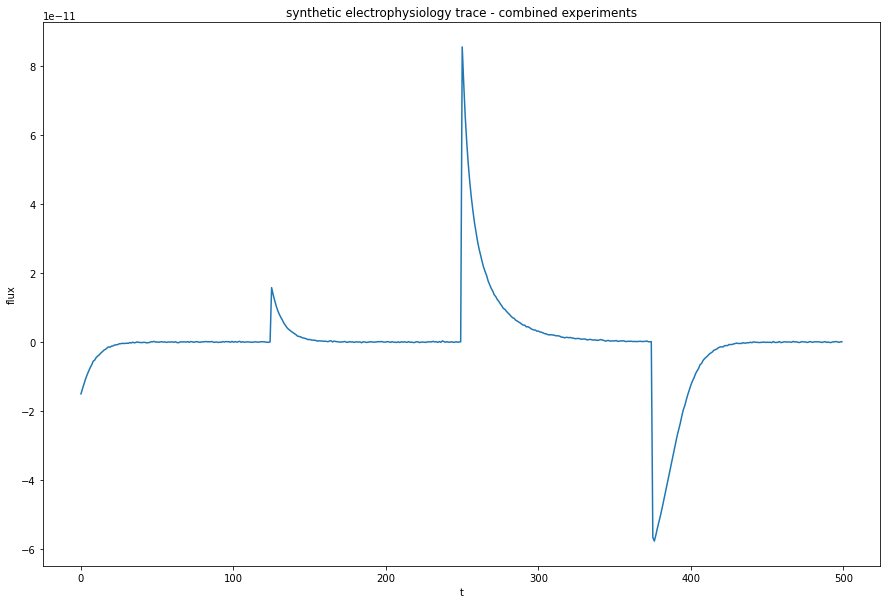

In [17]:
datafile2 = ('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/scripts/emcee_intermediate_transporter_data_2stage_2ph.csv')
y_obs = np.loadtxt(f'{datafile2}', delimiter=',', skiprows=1, usecols=1).tolist()  # load data from file
plt.figure(figsize=(15,10))
plt.plot(y_obs)
plt.title('synthetic electrophysiology trace - combined experiments')
plt.ylabel('flux')
plt.xlabel('t')

In [10]:
import numpy as np
import matplotlib.pyplot as plt

datafile = '/Users/georgeau/Desktop/research_data/local_macbook/intermediate_transporter/20220125_182048_intermediate_transporter/DEBUG_intermediate_transporter_20220125_182048_data.csv'

D = np.loadtxt(f'{datafile}', delimiter=',', skiprows=1, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13]) # load data from file

print('synthetic model')
max_logl_synth = 9152.388064207305
p_synth = [1.e+01, 3.e+00, 3.e+00, 7.e+00, 2.e+00, 2.e+00, 2.e+00, 2.e+00, 7.e+00, 3.e+00,
 3.e+00, 1.e-13]
print(max_logl_synth)
print(p_synth)
print('\n')


print('sampled dataset')

max_logl_sample = np.max(np.transpose(D)[12])
max_logl_sample_idx = np.argmax(np.transpose(D)[12])
p_max_logl_sample = D[max_logl_sample_idx][:-1]

print(max_logl_sample)
print(max_logl_sample_idx)
print(p_max_logl_sample)

synthetic model
9152.388064207305
[10.0, 3.0, 3.0, 7.0, 2.0, 2.0, 2.0, 2.0, 7.0, 3.0, 3.0, 1e-13]
/n
sampled dataset
9154.386195397348
89868
[1.00209142e+01 3.10251346e+00 2.84696666e+00 6.80629869e+00
 2.12910157e+00 2.92907531e+00 1.97572376e+00 2.12511228e+00
 8.14206985e+00 3.16327798e+00 3.01175369e+00 1.11998957e-13]
